## Deep Learning Study
#### Week 2: How to train deep learning models?
![image](https://user-images.githubusercontent.com/44901828/227123995-9562e26f-cf74-4cbe-b2c0-ec0a8e8eef93.png)
- Pytorch에서 제공하는 nn.Module 클래스를 활용하여 간단한 딥 러닝 모델을 설계하고, binary classification을 수행하도록 학습해 봅시다.
- 주어진 데이터는 단순 직선 1개로 분류할 수 없는 데이터입니다. 이러한 데이터를 layer가 1개인 neural network와 2개인 shallow neural network를 각각 활용해서 분류해보고, 어떤 결과가 나타나는지 확인해보겠습니다.

In [1]:
import random
import numpy as np

# 재현을 위해 seed 고정
random.seed(42)
np.random.seed(42)

x1_train=[]
x2_train=[]
y_train=[]

# 데이터 개수
m = 10000

for i in range(m):
    x1_train.append(random.uniform(-10, 10))
    x2_train.append(random.uniform(-10, 10))
    if x1_train[-1] < -5 or x1_train[-1] > 5:
        y_train.append(1)
    else:
        y_train.append(0)

x = np.array([x1_train, x2_train]).transpose()
y = np.array(y_train).reshape(-1, 1)

print(f"X: {x.shape}\n {x}")
print(f"Y: {y.shape}\n {y}")

X: (10000, 2)
 [[ 2.78853597e+00 -9.49978490e+00]
 [-4.49941363e+00 -5.53578524e+00]
 [ 4.72942428e+00  3.53398975e+00]
 ...
 [-6.16295894e+00  3.12475245e+00]
 [-3.56661939e+00 -9.95363137e-01]
 [ 4.73490767e+00  3.83251837e-03]]
Y: (10000, 1)
 [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


- 각각의 데이터는 (x1, x2) 형태의 2차원 좌표로 표현될 수 있습니다.
- matplotlib를 활용하여 라벨에 따른 데이터의 분포를 시각화해보겠습니다.

X: (10000, 2)
Y: (10000, 1)


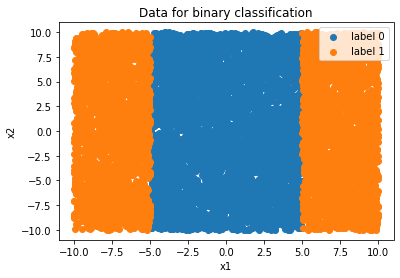

In [2]:
from matplotlib import pyplot as plt

print("X:", x.shape)
print("Y:", y.shape)

label_0 = [[], []]
label_1 = [[], []]

for i in range(m):
    if y[i][0] == 0:
        label_0[0].append(x[i][0])
        label_0[1].append(x[i][1])        
    else:
        label_1[0].append(x[i][0])
        label_1[1].append(x[i][1])   

plt.scatter(label_0[0], label_0[1])
plt.scatter(label_1[0], label_1[1])
plt.title("Data for binary classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["label 0", "label 1"])
plt.show()

![image](https://user-images.githubusercontent.com/44901828/227125820-004331b2-9aaa-4297-9d1c-dff200287a2b.png)
- 이제 주어진 데이터를 분류하기 위한 neural network를 설계합니다.
- Layer가 총 2개인 네트워크이고, activation function은 sigmoid를 사용했습니다.
- Input dimension 2, Output dimension 1을 제외한 나머지 hidden layer의 차원은 자유롭게 조정할 수 있습니다.

In [3]:
import torch
from torch import nn

torch.random.seed()
x = torch.Tensor(x)
y = torch.Tensor(y)

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

![image](https://user-images.githubusercontent.com/44901828/227125075-3a0a1e01-eca5-45fc-96e6-b55843de3b9b.png)
- Loss function은 Binary classification에 가장 많이 사용되는 binary crossentropy를 사용합니다.
- 분류에 성공한 데이터의 비율을 확인하기 위해 accuracy 함수도 정의해 줍니다.
- Layer의 output은 sigmoid 함수를 거쳤기 때문에 0과 1 사이의 연속적인 분포를 가지게 됩니다. Label을 0 또는 1로 분류하기 위해, output이 0.5보다 작으면 0, 크거나 같으면 1로 간주합니다.

In [4]:
loss_function = nn.BCELoss()

def accuracy(pred, gold):
    pred = pred.view(-1)
    pred = (pred >= 0.5) * 1
    gold = gold.view(-1)
    return (torch.sum(pred == gold) / len(pred)).item()

- 위에서 준비한 데이터, 모델, loss를 이용하여 학습을 진행합니다.
- Forward/backward pass를 여러번 반복하며 loss가 작아지도록 gradient descent와 back propagation을 수행하는 과정은 torch를 이용하여 간단하게 수행 가능합니다.
- 총 1000 step동안 반복하면서, 100step 마다 loss와 accuracy를 확인해 보겠습니다.

In [5]:
def train(model, x, y):
  steps = 1000

  model = model

  loss_per_step = []
  acc_per_step = []

  optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

  for i in range(steps):
      # Forward pass
      activation = model(x) # shape: (10000, 1)

      # Loss 계산 및 저장
      loss = loss_function(activation, y) # shape: (10000, 1)
      loss_per_step.append(loss.mean(axis=0).item())

      # Backward pass    
      # 계산된 gradient를 활용하여 파라미터 업데이트
      loss.backward()
      optimizer.step()

      # Accuracy 계산 및 저장
      acc = accuracy(activation, y)
      acc_per_step.append(acc)
    
      if i > 0 and i % 100 == 0:
          print(f"loss at step {i}: {loss_per_step[i]}")
          print(f"acc at step {i}: {acc_per_step[i]}")
      
  return loss_per_step, acc_per_step

- 모델이 input data x, y를 학습하며 100step 마다 loss와 accuracy값을 저장한 뒤 시각화해서 살펴보겠습니다.
- 1개의 layer를 사용한 네트워크의 경우 학습 과정에서 loss와 accuracy가 일정 수준 이상으로 개선되지 않는 것을 볼 수 있습니다. 왜 학습이 잘 되지 않을까요?

loss at step 100: 2.1943914890289307
acc at step 100: 0.48579999804496765
loss at step 200: 1.838108777999878
acc at step 200: 0.4927999973297119
loss at step 300: 1.2681806087493896
acc at step 300: 0.49729999899864197
loss at step 400: 0.723761260509491
acc at step 400: 0.4717999994754791
loss at step 500: 1.0092556476593018
acc at step 500: 0.5180000066757202
loss at step 600: 1.6158134937286377
acc at step 600: 0.506600022315979
loss at step 700: 2.058797836303711
acc at step 700: 0.5045999884605408
loss at step 800: 2.2721610069274902
acc at step 800: 0.5065000057220459
loss at step 900: 2.239445209503174
acc at step 900: 0.504800021648407


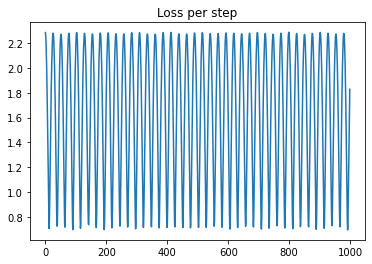

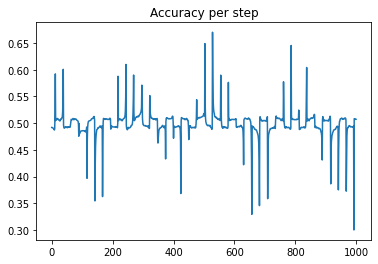

In [6]:
loss_per_step, acc_per_step = train(model, x, y)

plt.plot(loss_per_step)
plt.title("Loss per step")
plt.show()

plt.plot(acc_per_step)
plt.title("Accuracy per step")
plt.show()

- Layer가 1개밖에 없는 shallow network는 단순한 1차 함수만 근사할 수 있습니다. 
- 주어진 데이터는 직선 하나로 완벽하게 분류할 수 없는 데이터이기 때문에, 모델이 데이터의 특성을 익히기 역부족했습니다.
- 학습된 모델이 분류한 데이터와, 원본 데이터 분포를 비교해보겠습니다.

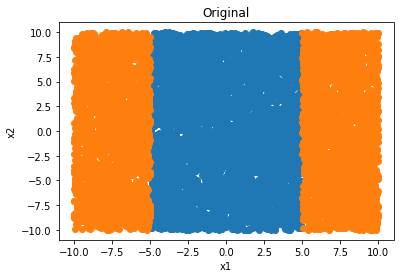

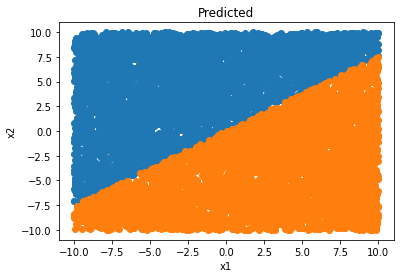

In [7]:
# 원본 데이터 분포
plt.scatter(label_0[0], label_0[1])
plt.scatter(label_1[0], label_1[1])
plt.title("Original")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

pred_0 = [[], []]
pred_1 = [[], []]

# Forward pass
pred = model(x)

for i in range(m):    
    if pred[i][0] < 0.5:
        pred_0[0].append(x[i][0])
        pred_0[1].append(x[i][1])        
    else:
        pred_1[0].append(x[i][0])
        pred_1[1].append(x[i][1])

plt.scatter(pred_0[0], pred_0[1])
plt.scatter(pred_1[0], pred_1[1])
plt.title("Predicted")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


![image](https://user-images.githubusercontent.com/44901828/227124930-a5374d7f-c166-4fa4-8467-31dc9d69ebe2.png)
- 주어진 데이터를 분류하기 위한 새로운 neural network를 설계해 보겠습니다.
- Layer가 총 2개인 네트워크이고, activation function은 sigmoid를 사용했습니다.
- Input dimension 2, Output dimension 1을 제외한 나머지 hidden layer의 차원은 자유롭게 조정할 수 있습니다.

loss at step 100: 0.6966256499290466
acc at step 100: 0.5001999735832214
loss at step 200: 0.7028173208236694
acc at step 200: 0.5001999735832214
loss at step 300: 0.7038747072219849
acc at step 300: 0.4997999966144562
loss at step 400: 0.6666945219039917
acc at step 400: 0.6266999840736389
loss at step 500: 0.5425832271575928
acc at step 500: 0.8011999726295471
loss at step 600: 0.2762777805328369
acc at step 600: 0.9097999930381775
loss at step 700: 0.13704481720924377
acc at step 700: 0.9466999769210815
loss at step 800: 0.0848257839679718
acc at step 800: 0.9664999842643738
loss at step 900: 0.08228578418493271
acc at step 900: 0.9659000039100647


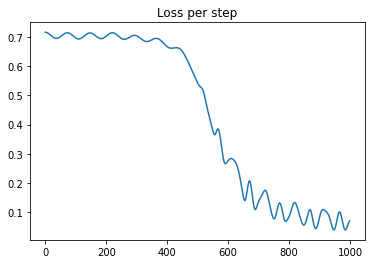

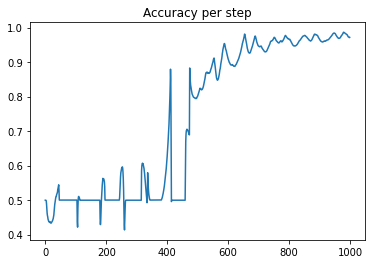

In [8]:
new_model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)

loss_per_step, acc_per_step = train(new_model, x, y)

plt.plot(loss_per_step)
plt.title("Loss per step")
plt.show()

plt.plot(acc_per_step)
plt.title("Accuracy per step")
plt.show()

- Layer가 1개밖에 없던 모델에 비해 loss가 더 안정적으로 감소하는 것을 볼 수 있습니다. Accuracy도 매우 높네요. 성공입니다!
- 새로운 모델이 분류한 데이터의 분포는 어떤 모양인지 살펴보도록 하겠습니다.

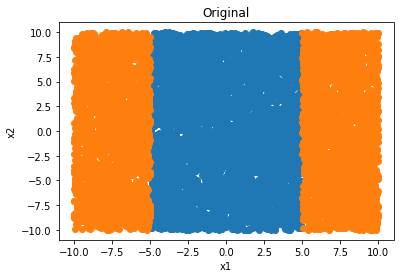

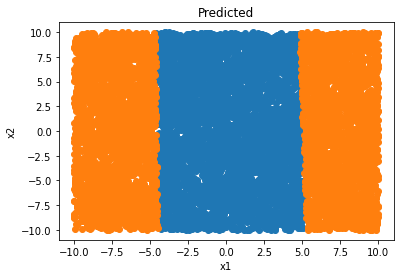

In [9]:
# 원본 데이터 분포
plt.scatter(label_0[0], label_0[1])
plt.scatter(label_1[0], label_1[1])
plt.title("Original")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

pred_0 = [[], []]
pred_1 = [[], []]

# Forward pass
pred = new_model(x)

for i in range(m):    
    if pred[i][0] < 0.5:
        pred_0[0].append(x[i][0])
        pred_0[1].append(x[i][1])        
    else:
        pred_1[0].append(x[i][0])
        pred_1[1].append(x[i][1])

plt.scatter(pred_0[0], pred_0[1])
plt.scatter(pred_1[0], pred_1[1])
plt.title("Predicted")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
